# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
# 1, i) Carregando os dados e criando o DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../demo01.csv')
df.head(3)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False


In [2]:
# 3, ii) Avaliando as variáveis
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

Como podemos ver, existem várias variávels independentes que podemos usar para prever nossa variável dependente 'mau' (target)

In [3]:
# 3, iii) Tipos das Variáveis
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

Como podemos ver, temos a maior parte dos dados como sendo qualitativos (categóricos, denotados pelo dtype 'object'), com nossa variável target sendo booleana, e com algumas variáveis numéricas como `int64`, `idade` e `tempo_emprego`. Algumas variáveis, como `possui_celular`, estão no tipo int (inteiro), mas são categóricas, que provavelmente foram "dummyzadas", associadas a numeros inteiros.

In [4]:
# 3, iv) Contando os missings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [5]:
df.shape

(16650, 16)

Como podemos constatar, não há missings nessa base de dados.

In [6]:
# 3, v) Distribuição da variável target ('Mau')
valores_mau = df['mau'].value_counts().reset_index()
valores_mau

,mau,count
0,False,16260
1,True,390


Text(0.5, 1.0, 'Distribuição da Variável "mau"')

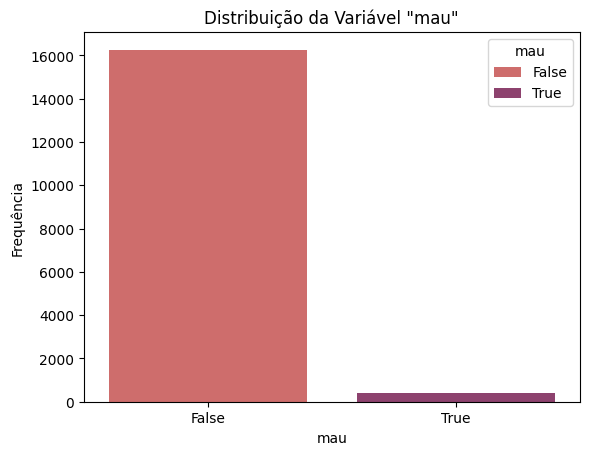

In [7]:
sns.countplot(x='mau', data=df, hue='mau', palette='flare')
plt.ylabel('Frequência')
plt.title('Distribuição da Variável "mau"')

Como podemos ver, a maioria dos dados da nossa variável target são 'False' (não são maus)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.

    Dica:
    1. inicie uma lista vazia
    2. faça um for ao longo dos nomes das variáveis,
    3. conte o número de categorias dessa variável
    4. acumule essa informação de 3. na lista que você criou em 1.
    5. No final, essa lista pode ser atribuída à nossa variável.

In [8]:
# 2, 1) Criando um DataFrame com o nome e o tipo de dados das variáveis
df_variaveis = pd.DataFrame(
    {
        'variavel': df.columns,
        'tipo_dados': df.dtypes.values
    }
)

df_variaveis

,variavel,tipo_dados
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


Adicionando a quantidade de categorias pra cada variável categórica:
    1. inicie uma lista vazia
    2. faça um for ao longo dos nomes das variáveis,
    3. conte o número de categorias dessa variável
    4. acumule essa informação de 3. na lista que você criou em 1.
    5. No final, essa lista pode ser atribuída à nossa variável.

In [9]:
# 2, 2) Adicionando uma coluna pra contar a quantidade de categorias de cada variável

# 2, 2i) Criando lista vazia
num_categorias = []

# 2, 2ii) Iterar sobre os nomes das variveis
for var in df.columns:
    # Contar o número de categorias (valores únicos) para cada variável usando nunique()
    num_categorias.append(df[var].nunique())

# Adicionar a coluna 'qtd_categorias' ao DataFrame
df_variaveis['qtd_categorias'] = num_categorias

df_variaveis

,variavel,tipo_dados,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [10]:
# 3) Vamos transformar as variáveis que são categórias mas não estão como 'dummy'

# 3, i) Vamos criar uma lista com as variáveis que queremos tornar dummy
lista_variaveis_dummy = df.select_dtypes('object').columns.to_list()
lista_variaveis_dummy

# 3, ii) Transformar em dummy
df_dummy = pd.get_dummies(df, columns=lista_variaveis_dummy, drop_first=True)
df_dummy


,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,True,True,False,False,False,True,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False


In [11]:
df_dummy.columns

Index(['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [12]:
# 4) Criando uma tabela cruzada entre email e posse de veiculo e decidir a melhor
# Para averiguarmos qual variável é melhor, vamos olhar cada uma separadamente...

# 4, i) Vamos criar uma função para gerar uma tabela cruzada da variável com a variavel target 'mau'
def calcular_crosstab(df, coluna_1, coluna_2):
    crosstab = pd.crosstab(
        df[coluna_1], df[coluna_2], normalize='index'
    )
    crosstab.reset_index()
    crosstab.columns = ['mau=0', 'mau=1']
    
    crosstab = crosstab.multiply(100).round(2)  # Multiplicando por 100 e arredondando para 2 casas decimais

    return crosstab

# 4, ii) Chamar a função para POSSUIR_EMAIL e analisar sua correlação com 'mau'
calcular_crosstab(df=df_dummy, coluna_1='possui_email', coluna_2='mau')

,mau=0,mau=1
possui_email,,
0,97.63,2.37
1,97.97,2.03


**Interpretação:** Quando a variável `mau=1`, *2% não possuem email, e 2% possuem email*. Ou seja, a diferença entre 'possuir email' ou não possuir email, analisando os dados de mau=1, a variável `possui_email` **NÃO É FORTE** para avaliar a variável target `mau`.
Além disso, note que a variável `possui_email` quase não muda quando mau=1 ou mau=0, o que significa que a variável possui_email não muda muito em nenhuma desses casos.

In [13]:
# 4, ii) Calcular para possui_veiculo_Y

calcular_crosstab(df=df_dummy, coluna_1='posse_de_veiculo_Y', coluna_2='mau')

,mau=0,mau=1
posse_de_veiculo_Y,,
False,97.57,2.43
True,97.79,2.21


**Interpretação**: Quando `mau=1`, aproximadamente 2.4% das pessoas não possuem veículo (`posse_de_veiculo_Y = False`), enquanto que 2.2% possuem veículo. Quando `mau=0`, uma praticamente a mesma porcentagem de pessoas possui ou não possui carro, ou seja, essa variável **também não é forte para prever 'mau'**.

#### 4 - Conclusão Final
Nenhuma das variáveis categóricas analisadas são estatísticamente falando significantes para prever a variável target 'mau', porém, entre ambas, a variável `possui_email` parece ter uma diferença estatística um pouco maior entre seus valores de False e True quando `mau=1`. Isso se dá por que:

*   A variável `possui_email` possui 0.34 pontos decimais de diferença entre seus valores de True e False quando `mau=1`.
*   A variável `posse_de_veiculo_Y` possui 0.22 pontos decimais de diferença entre seus valores de True e False quando `mau=1`.

Ou seja, a variável `possui_email` diferencia mais suas duas categorias quando `mau=1`, portando, ela é a melhor opção, dentre as duas, para prever a variável target `mau`.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [14]:
# 5) Salvar a base
df_dummy.to_excel('base_M7T1.csv', index=False)